In [11]:
import pyart
from wsrlib import *
import matplotlib.pyplot as plt
import numpy as np

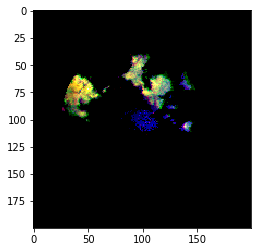

In [36]:
key = 'WSO_201408010010_DOPVOL1'

# Note: don't need 'C' file for roosts since we don't use third elevation
files = [f'data/{key}_{suffix}.iri' for suffix in ['A', 'B']] 
radars = [pyart.io.read(f) for f in files]

# Note: data not available past ~110km
data, fields, elev, y, x = radar2mat(radars, coords='cartesian', dim=200, r_max=150000)

def scale(data, a, b):
    return np.clip((data - a)/(b-a), 0., 1.)

rgb = np.stack((scale(data[0,0,:,:], -5, 35),
                scale(data[0,1,:,:], -5, 35),
                scale(data[1,0,:,:], -20, 20)),
                axis=2)

plt.imshow(rgb)

In [37]:
data.shape

(3, 2, 200, 200)

In [16]:
print(y.shape)

(2400,)
